In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.cluster import KMeans, DBSCAN
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import silhouette_score

In [6]:
df = pd.read_csv('/content/Mall_Customers (1).csv')

In [7]:
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [8]:
# Check for missing values
print(df.isnull().sum())

# Encode categorical 'Genre'
le = LabelEncoder()
df['Genre'] = le.fit_transform(df['Genre'])  # Male = 1, Female = 0

# Optional: drop CustomerID (not useful for ML)
df = df.drop('CustomerID', axis=1)

# Standardize the features
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)
scaled_df = pd.DataFrame(scaled_data, columns=df.columns)


CustomerID                0
Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64


In [9]:
X_train, X_test = train_test_split(scaled_df, test_size=0.2, random_state=42)


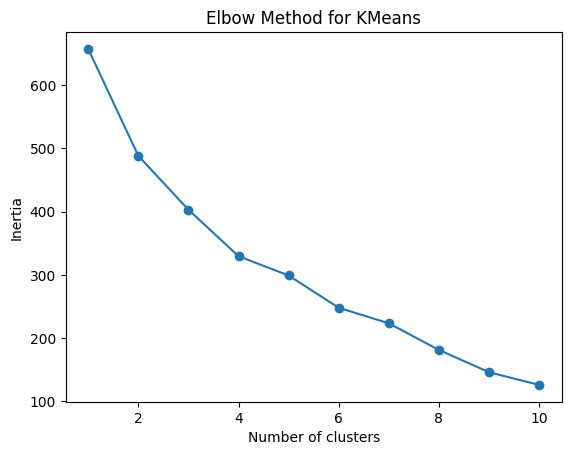

In [10]:
# Find the optimal number of clusters using the Elbow Method
inertia = []
for k in range(1, 11):
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(X_train)
    inertia.append(km.inertia_)

plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Method for KMeans')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

# Apply KMeans with optimal k (e.g., 5)
kmeans = KMeans(n_clusters=5, random_state=42)
kmeans.fit(X_train)
kmeans_labels = kmeans.predict(X_test)

# Add to test set for analysis
X_test_kmeans = X_test.copy()
X_test_kmeans['Cluster'] = kmeans_labels


In [11]:
dbscan = DBSCAN(eps=0.8, min_samples=5)
dbscan_labels = dbscan.fit_predict(X_test)

# Add to test set for analysis
X_test_dbscan = X_test.copy()
X_test_dbscan['Cluster'] = dbscan_labels


In [12]:
print("Silhouette Score for KMeans:", silhouette_score(X_test, kmeans_labels))
print("Silhouette Score for DBSCAN:", silhouette_score(X_test, dbscan_labels))


Silhouette Score for KMeans: 0.2645541248704483
Silhouette Score for DBSCAN: -0.013069875251079272


In [13]:
# Cross-validation using silhouette score across folds (simulated)
from sklearn.model_selection import KFold

kf = KFold(n_splits=5, shuffle=True, random_state=42)
scores = []

for train_index, test_index in kf.split(scaled_df):
    X_train_fold, X_test_fold = scaled_df.iloc[train_index], scaled_df.iloc[test_index]
    km = KMeans(n_clusters=5, random_state=42)
    km.fit(X_train_fold)
    preds = km.predict(X_test_fold)
    score = silhouette_score(X_test_fold, preds)
    scores.append(score)

print("Average Silhouette Score (KMeans with CV):", np.mean(scores))


Average Silhouette Score (KMeans with CV): 0.25753685563094375
